In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sample = "FR121_d62DPPC"
bulk = "D2Obuffer"
pressure = ["12mN_trans","12mN_cis"]#


qz = []
intensities = []
intensities_err = []

for p in pressure:
    try:
        name_file = "Z:/RajendraGiri/2023Jun/" + sample + "_" + p + "_" + bulk + "_04deg_all_RQz.dat"  
        df = pd.read_csv (name_file, sep="\t")
    except:
        name_file = "Z:/RajendraGiri/2023Jun/" + sample + "_" + p + "_" + bulk + "_10deg_all_RQz.dat"  
        df = pd.read_csv (name_file, sep="\t")
    values = np.array(df)
    qz.append(values[:,0])
    intensities.append(values[:,1])
    intensities_err.append(values[:,2])

In [20]:
def fresnel(qz,qc = 0.018, roughness=2.4):
    return (np.exp(-qz**2 * roughness**2) *
            abs((qz - np.sqrt((qz**2 - qc**2) + 0j)) /
            (qz + np.sqrt((qz**2 - qc**2)+0j)))**2)

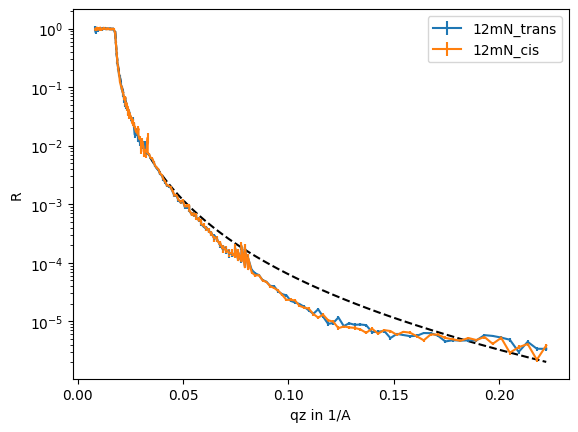

In [23]:
fig = plt.figure()
ax = fiｇ.gca()
ax.plot(qz[0], fresnel(qz[0]), linestyle = "--", color = "black")
for n in range(len(pressure)):
    pressure_label = str(pressure[n])
    ax.errorbar(qz[n], intensities[n], intensities_err[n], label = pressure_label)
    ax.set_yscale("log")
    ax.set_ylabel("R")
    ax.set_xlabel("qz in 1/A")
ax.legend()
plt.savefig("processed/FR121_d62DPPC_NR49-50")
plt.show()

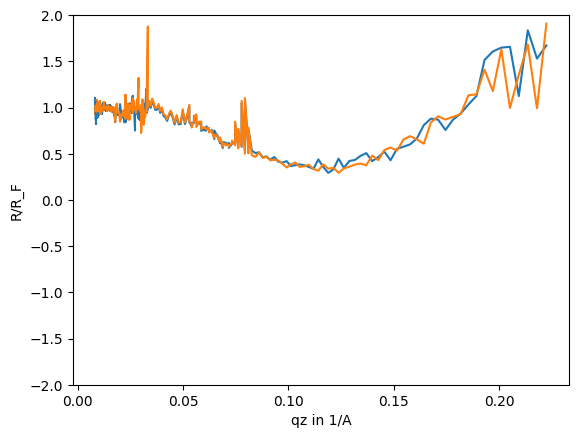

In [21]:
fig = plt.figure()
ax = fiｇ.gca()
for n in range(len(pressure)):
    ax.errorbar(qz[n], intensities[n]/fresnel(qz[n]), intensities_err[n])
    ax.set_ylabel("R/R_F")
    ax.set_xlabel("qz in 1/A")
    ax.set_ylim(-2,2)
plt.show()